# Capstone project 3: Sentiment Analysis on the US Election Candidates

### BACKGROUND
The 2020 US election happened on the 3rd November 2020 and the resulting impact to the world will no doubt be large, irrespective of which candidate is elected! 

Twitter was a top social app that collected huge size of comments on both candidates positively and negatively. Ironically and debatably, Twitter suspended candidate Trump's account and some conservative voices and groups, and therefore a lot of Trump's followers left Twitter. In this case, the Twitter's comments might not truely reflecting the voices regarding both candidates. But it is a decent dataset for NLP practice for sentiment analysis.

### GOAL
The goal of this project is to carry out EDA and sentiment analysis based on the datasets provided. Hopefully to check if there is any correlation between the election result and the text messages here.


### DATA
* Link to data: https://www.kaggle.com/manchunhui/us-election-2020-tweets

Tweets collected, using the Twitter API statuses_lookup and snsscrape for keywords, with the original intention to try to update this dataset daily so that the timeframe will eventually cover 15.10.2020 and 04.11.2020. Added 06.11.2020 With the events of the election still ongoing as of the date that this comment was added, I've decided to keep updating the dataset with tweets until at least the end of the 6th Nov. Added 08.11.2020, just one more version pending to include tweets until at the end of the 8th Nov.

#### Columns are as follows:
* created_at: Date and time of tweet creation
* tweet_id: Unique ID of the tweet
* tweet: Full tweet text
* likes: Number of likes
* retweet_count: Number of retweets
* source: Utility used to post tweet
* user_id: User ID of tweet creator
* user_name: Username of tweet creator
* user_screen_name: Screen name of tweet creator
* user_description: Description of self by tweet creator
* user_join_date: Join date of tweet creator
* user_followers_count: Followers count on tweet creator
* user_location: Location given on tweet creator's profile
* lat: Latitude parsed from user_location
* long: Longitude parsed from user_location
* city: City parsed from user_location
* country: Country parsed from user_location
* state: State parsed from user_location
* state_code: State code parsed from user_location
* collected_at: Date and time tweet data was mined from twitter*

#### Kaggle kernels referenced
* https://www.kaggle.com/manchunhui/us-presidential-election-sentiment-analysis
* https://www.kaggle.com/tkubacka/a-story-told-through-a-heatmap
* https://www.kaggle.com/harikrishna9/who-won-in-us-elections-2020-according-to-tweets


## Part 1: Data Wrangling and EDA

### 0.0 Load libraries

In [1]:
#conda install geopandas
#!pip install seaborn
#!pip install nltk

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import re 
from nltk.tokenize.toktok import ToktokTokenizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

#import warnings
#warnings.warn("Warning...........Message")

### 1.0 Load data 

#### 1.1 Trump's data

In [3]:
trump = pd.read_csv("./data/hashtag_donaldtrump.csv", lineterminator="\n")
trump.head(3)

created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,...  ...   

  user_followers_count                 user_location        lat        long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.774270  -80.193660   
1            1067661.0                           NaN        NaN         NaN   
2               1185.0                      Portland  45.520247 -122.674195   

       city                   country      continent    state state_code  \
0       NaN  United States of America  North America  Florida         FL   
1       NaN                       NaN            NaN      NaN        NaN   
2  Portland  United States of America  North America   Oregon         OR   

                    collected_at  
0            2020-10-21 00:00:00  
1  2020-10-21 00:00:00.373216530  
2  2020-10-21 00:00:00.746433060  

[3 rows x 21 columns]

In [4]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [5]:
trump.describe()

tweet_id          likes  retweet_count       user_id  \
count  9.709190e+05  970919.000000  970919.000000  9.709190e+05   
mean   1.322494e+18       7.477011       1.698500  4.468311e+17   
std    2.555133e+15     158.058117      40.028419  5.544702e+17   
min    1.316529e+18       0.000000       0.000000  5.310000e+02   
25%    1.320478e+18       0.000000       0.000000  2.169326e+08   
50%    1.323612e+18       0.000000       0.000000  2.373392e+09   
75%    1.324505e+18       1.000000       0.000000  1.078344e+18   
max    1.325589e+18   74084.000000   20491.000000  1.325581e+18   

       user_followers_count            lat           long  
count          9.709190e+05  445719.000000  445719.000000  
mean           2.260357e+04      35.697936     -40.369638  
std            3.042152e+05      18.823129      67.531751  
min            0.000000e+00     -90.000000    -175.202642  
25%            7.700000e+01      32.701939     -96.796856  
50%            4.410000e+02      39.783730     -74.006015  
75%            2.066000e+03      46.603354       6.776314  
max            1.911533e+07      90.000000     179.048837

In [6]:
trump.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     876
user_id                      0
user_name                   16
user_screen_name             0
user_description        101266
user_join_date               0
user_followers_count         0
user_location           294953
lat                     525200
long                    525200
city                    743732
country                 528171
continent               528154
state                   650299
state_code              670494
collected_at                 0
dtype: int64

#### 1.2 Biden's data

In [7]:
biden = pd.read_csv("./data/hashtag_joebiden.csv", lineterminator="\n")
#data.columns=['Text', 'Sentiment']
biden.head(3)

created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   
2  2020-10-15 00:00:20  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...    0.0            0.0   

             source       user_id           user_name user_screen_name  \
0         TweetDeck  3.606665e+08  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  8.099044e+08         Cheri A. 🇺🇸     Biloximeemaw   
2   Twitter Web App  3.494182e+09          Flag Waver      Flag_Wavers   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   
2                                                NaN  ...   

  user_followers_count                 user_location        lat        long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.774270  -80.193660   
1               6628.0                           NaN        NaN         NaN   
2               1536.0         Golden Valley Arizona  46.304036 -109.171431   

   city                   country      continent    state state_code  \
0   NaN  United States of America  North America  Florida         FL   
1   NaN                       NaN            NaN      NaN        NaN   
2   NaN  United States of America  North America  Montana         MT   

                    collected_at  
0            2020-10-21 00:00:00  
1  2020-10-21 00:00:00.517827283  
2  2020-10-21 00:00:01.035654566  

[3 rows x 21 columns]

In [8]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [9]:
biden.describe()

tweet_id          likes  retweet_count       user_id  \
count  7.768860e+05  776886.000000  776886.000000  7.768860e+05   
mean   1.322844e+18      10.161164       2.131331  4.532033e+17   
std    2.585560e+15     390.974423      96.661527  5.573483e+17   
min    1.316529e+18       0.000000       0.000000  1.081000e+03   
25%    1.320870e+18       0.000000       0.000000  2.257285e+08   
50%    1.323899e+18       0.000000       0.000000  2.464208e+09   
75%    1.325115e+18       2.000000       0.000000  1.088044e+18   
max    1.325589e+18  165702.000000   63473.000000  1.325575e+18   

       user_followers_count            lat           long  
count          7.768860e+05  355293.000000  355293.000000  
mean           2.884994e+04      35.104203     -41.979660  
std            4.141085e+05      17.907910      67.823724  
min            0.000000e+00     -79.406307    -172.120051  
25%            7.400000e+01      31.816038     -97.268406  
50%            4.280000e+02      39.783730     -74.006015  
75%            2.081000e+03      43.653482       5.966069  
max            8.241710e+07      90.000000     179.048837

In [10]:
biden.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_id                      0
user_name                   18
user_screen_name             0
user_description         82006
user_join_date               0
user_followers_count         0
user_location           233791
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
collected_at                 0
dtype: int64

From the preliminary looking of both trump and biden's data, it is clear that both of them have a lot of missing data regarding to the users' description, location, country and other features. 

### 2.0 Exploratory Data Analysis

In [11]:
#!pip install langdetect
#!pip install missingno
#!pip install textblob
#!pip install wordcloud
#!pip install plotly

In [12]:
# Import Libraries
import os
import time
import missingno as msno
import pandas as pd
import geopandas as gpd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import nltk, re, string, collections, unicodedata

%matplotlib inline
from matplotlib import cm, dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from langdetect import detect
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import plotly.graph_objects as go

In [13]:
# clean the data
#print(trump.country.unique())
#print(trump.country.unique())
trump['country'].replace({'United States': 'United States of America'}, inplace=True)
biden['country'].replace({'United States': 'United States of America'}, inplace=True)

In [14]:
# add features
def normalise(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.where(x == 0, 0, x/y)

#
def sentiment(data):
    temp = []
    for row in data:
        tmp = sid.polarity_scores(row)
        temp.append(tmp)
    return temp

In [15]:
# Convert date features to datetime object
biden['user_join_date'] = pd.to_datetime(biden['user_join_date'])
trump['user_join_date'] = pd.to_datetime(trump['user_join_date'])
biden['collected_at'] = pd.to_datetime(biden['collected_at'])
trump['collected_at'] = pd.to_datetime(trump['collected_at'])
biden['created_at'] = pd.to_datetime(biden['created_at'])
trump['created_at'] = pd.to_datetime(trump['created_at'])

# create additional datetime features
biden['created_at_r'] = biden['created_at'].dt.strftime('%Y-%m-%d %H')
trump['created_at_r'] = trump['created_at'].dt.strftime('%Y-%m-%d %H')
biden['created_at_r2'] = biden['created_at'].dt.strftime('%m-%d')
trump['created_at_r2'] = trump['created_at'].dt.strftime('%m-%d')

In [16]:
# normalise likes and retweets to allow fair analysis and comparison
b_tdiff=(biden['collected_at'] - biden['created_at'])
t_tdiff=(trump['collected_at'] - trump['created_at'])
#print(b_tdiff)
# convert the tdiff to hours
b_tdiff=(b_tdiff.dt.days * 24 + b_tdiff.dt.seconds / 3600)
t_tdiff=(t_tdiff.dt.days * 24 + t_tdiff.dt.seconds / 3600)
#print(b_tdiff)

# Use numpy vectorisation to create new columns for normalised likes and retweets
biden['likes_norm'] = normalise(biden['likes'],b_tdiff)
biden['retweet_norm'] = normalise(biden['retweet_count'],b_tdiff)
trump['likes_norm'] = normalise(trump['likes'],t_tdiff)
trump['retweet_norm'] = normalise(trump['retweet_count'],t_tdiff)

In [17]:
# Visualisation args
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

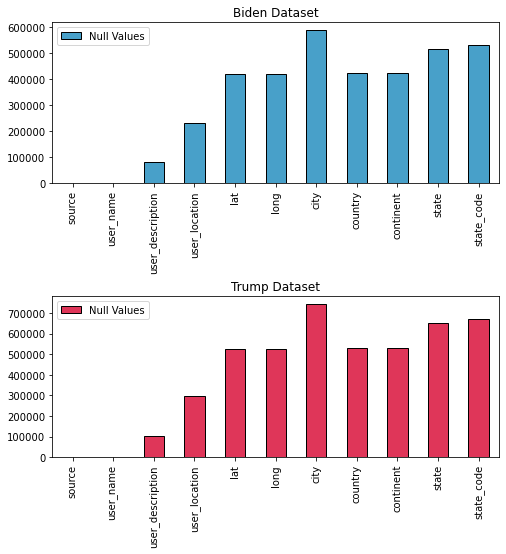

In [18]:
# Visualize the null values in both dataframes
na_vals_b=pd.DataFrame({'Null Values':biden.isna().sum()})
na_vals_b=na_vals_b.loc[na_vals_b['Null Values'] > 0]
na_vals_t=pd.DataFrame({'Null Values':trump.isna().sum()})
na_vals_t=na_vals_t.loc[na_vals_t['Null Values'] > 0]

# Null values visualisation for tweets about Joe Biden and Donald Trump
fig, ax=plt.subplots(2,1, figsize=(8,8), gridspec_kw={'hspace':0.7})

na_vals_b.plot.bar(color=barcolors[3], **barstyle, ax=ax[0])
ax[0].set_title('Biden Dataset')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

na_vals_t.plot.bar(color=barcolors[6], **barstyle, ax=ax[1])
ax[1].set_title('Trump Dataset')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

The bar plot above shows the missing values of different features for both trump and biden dataframe. In general, trump dataset has more missing values for each feature.

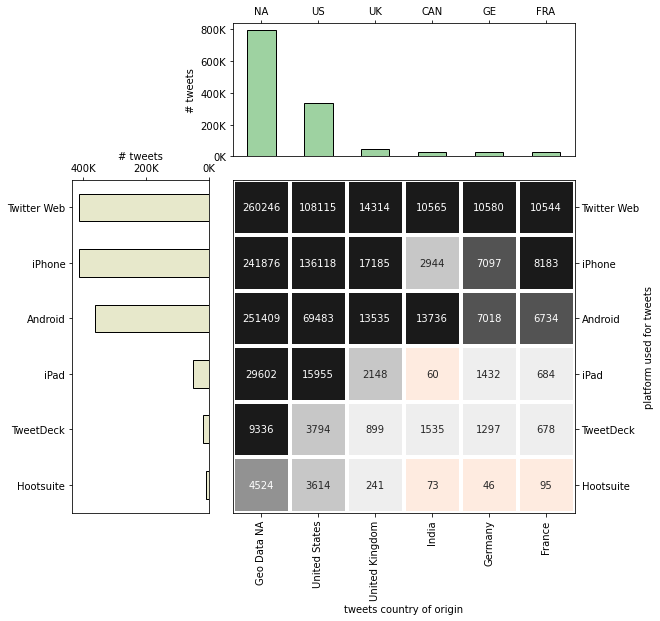

In [19]:
source_df = pd.concat([biden[['source','tweet','country']].copy(), trump[['source','tweet','country']].copy()])
source_df['country'].replace({'United States of America':'United States'}, inplace=True)
source_df = source_df.fillna('Geo Data NA')
source_df = source_df.drop_duplicates()

sources = pd.DataFrame(source_df.groupby(['source'])['tweet'].count().sort_values(ascending=False)[:6])
sources = sources.reset_index()
sourceslst = sources.source.to_list()

country = pd.DataFrame(source_df.groupby(['country'])['tweet'].count().sort_values(ascending=False)[:6])
country = country.reset_index()
countrylst = country.country.to_list()

platXtab = pd.DataFrame(source_df.groupby(['source','country'])['tweet'].count().unstack().fillna(0))

fig, ax = plt.subplots(2,2, figsize = (9,9), 
                     gridspec_kw = {'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap1(platXtab.loc[sourceslst,countrylst], hm_ax)
hm_ax.set_xlabel('tweets country of origin')
hm_ax.set_ylabel('platform used for tweets')
hm_ax.set_yticklabels(('Twitter Web','iPhone','Android','iPad','TweetDeck','Hootsuite'), rotation=0) 

bar_ax = ax[0,1]
platXtab.loc[sourceslst,countrylst].sum().plot.bar(ax=bar_ax, color=barcolors[1],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_xticklabels(('NA', 'US', 'UK', 'CAN', 'GE','FRA'), rotation=0) 
bar_ax.set_xlabel('')
bar_ax.set_ylabel('# tweets')

barh_ax = ax[1,0]
platXtab.loc[sourceslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[2],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_yticklabels(('Hootsuite','TweetDeck','iPad','Android','iPhone','Twitter Web'), rotation=0) 
barh_ax.set_xlabel('# tweets')
barh_ax.set_ylabel('')
plt.show()

This matrix plot is plotting the devices used for tweeting comments versus the countries. It is clear that we have a lot of missing values. Beyond that, US is the top country having the most comments. Twitter web, iphone, and android are leading devices for making tweet comments.

In [20]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
from shapely.geometry import Point, Polygon
crs = {'init': 'EPSG:4326'}

tmp=pd.concat([biden[['lat','long']].copy(),trump[['lat','long']].copy()])
tmp=tmp.dropna()
geometry = [Point(xy) for xy in zip(tmp['long'],tmp['lat'])]
geo_df=gpd.GeoDataFrame(tmp, crs=crs, geometry = geometry)

C:\Users\prue1\anaconda3\envs\geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


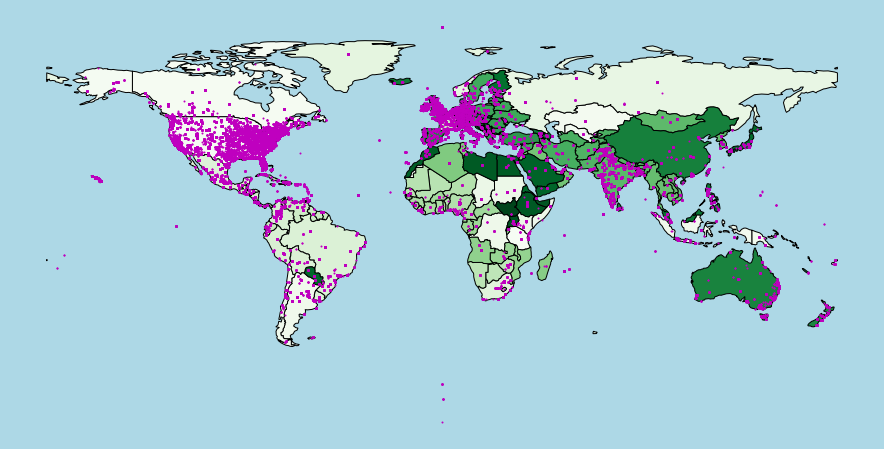

In [21]:
fig, ax = plt.subplots(1,figsize=(16,8), facecolor='lightblue')
world = world[world.name != "Antarctica"]
world.plot(ax=ax, cmap='Greens', edgecolors='black')
geo_df.plot(ax=ax, markersize=1, color='m', marker='o')
ax.axis('off')
plt.show()

This Geoplot here gives a visible view of all the tweets comments coming from. It is clear that the whole world is very interested in this US election as the future president will have big impact on global politics.

However, for the sentiment analysis purpose in this notebook, I am going to use the tweets from US only.

In [22]:
%%time
def detect_tweetlang(tweet):
    try:
        return detect(tweet)
    except:
        return 'unknown'

# Combine two data files and drop duplicates
lang_df=pd.concat([biden[['tweet','country']].copy(),trump[['tweet','country']].copy()])
lang_df['country'].replace({'United States of America':'United States'}, inplace=True)
lang_df=lang_df.fillna('Geo Data NA')
lang_df=lang_df.drop_duplicates()

# Randomly sample data for langauge analysis
lang_smdf=lang_df.sample(n=4000).copy()
lang_smdf['lang'] = lang_smdf['tweet'].apply(detect_tweetlang)

# Select top five languages and five countries for heatmap
langs=pd.DataFrame(lang_smdf.groupby(['lang'])['tweet'].count().sort_values(ascending=False)[:5])
langs=langs.reset_index()
langslst=langs.lang.to_list()

country=pd.DataFrame(lang_smdf.groupby(['country'])['tweet'].count().sort_values(ascending=False)[:5])
country=country.reset_index()
countrylst=country.country.to_list()

# Create a crosstab to feed data to heatmap
langXtab=pd.crosstab(lang_smdf.lang, lang_smdf.country, normalize=True)

Wall time: 37.4 s


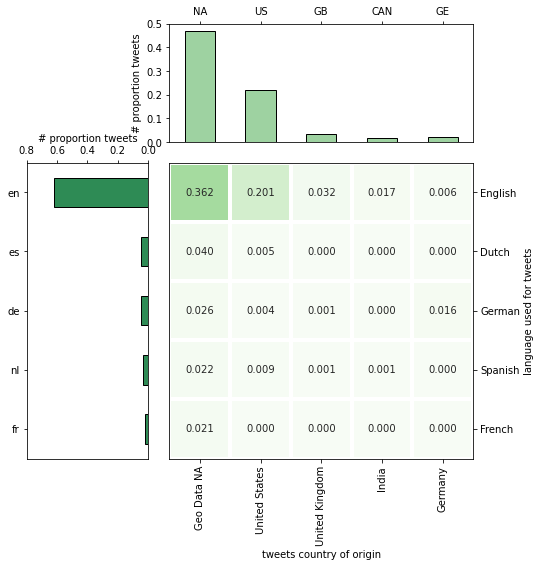

In [23]:
fig, ax=plt.subplots(2,2, figsize=(8,8), 
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap2(langXtab.loc[langslst,countrylst], hm_ax)
hm_ax.set_yticklabels(('English', 'Dutch', 'German','Spanish','French'), rotation=0) 
hm_ax.set_xlabel('tweets country of origin')
hm_ax.set_ylabel('language used for tweets')

bar_ax = ax[0,1]
langXtab.loc[langslst,countrylst].sum().plot.bar(ax=bar_ax, color=barcolors[1],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
bar_ax.set_xticklabels(('NA','US', 'GB', 'CAN', 'GE'), rotation=0) 
bar_ax.set_ylim([0, 0.5])
bar_ax.set_xlabel('')
bar_ax.set_ylabel('# proportion tweets')

barh_ax = ax[1,0]
langXtab.loc[langslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[5],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlim([0.8, 0])
barh_ax.set_xlabel('# proportion tweets')
barh_ax.set_ylabel('')
barh_ax.set_yticklabels(langslst[::-1], rotation=0) 

plt.show()

langdetect is a library to detect the languages used.

And this matrix plot is plotting the languages versus the countries. It is easy to tell that english is the dominant language for tweet comments.

In [24]:
class Chart_builder:
    
    def __init__(self,topic_index,number):
        super().__init__()
        self.topic_index = topic_index
        self.topics_list = ['source','country','state','continent','city']
        self.number = number
        self.index = self.topics_list[self.topic_index]
        self.Trump_tweets_sources_x = trump.groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.Trump_tweets_sources_y = trump.groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
        
        self.Biden_tweets_sources_x = biden.groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.Biden_tweets_sources_y = biden.groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
    
    def Builder(self):
        fig = go.Figure([go.Bar(x = self.Trump_tweets_sources_x, y = self.Trump_tweets_sources_y, name = 'Trump'),
                         go.Bar(x = self.Biden_tweets_sources_x, y = self.Biden_tweets_sources_y, name = 'Biden')])
        # Customize aspect
        fig.update_layout(title_text = 'top '+ str(self.number) + ' ' + self.index)
        fig.update_xaxes(title = 'sources')
        fig.update_yaxes(title = 'tweets count')
        fig.show()

In [25]:
topic_index = 2
number = 10 
launch = Chart_builder(topic_index,number)
launch.Builder()

This barplot here shows the top 10 states publishing tweets. Blue bar is for Trump and red bar for Biden. Generally, Trump has more comments from those top 10 states.

In [26]:
# Identify the common UserId's in both datasets and create tables for feed visualisation
common_ids=np.intersect1d(biden.user_id, trump.user_id)
unique_b=biden[~biden.user_id.isin(common_ids)].copy()
common_b=biden[biden.user_id.isin(common_ids)].copy()
unique_t=trump[~trump.user_id.isin(common_ids)].copy()
common_t=trump[trump.user_id.isin(common_ids)].copy()

common_df=pd.concat([common_b,common_t])
common_df=common_df.drop_duplicates()

# Create columns for visualiation
unique_b['usertype'] = 'Biden'
unique_t['usertype'] = 'Trump'
common_df['usertype'] = 'Both'

# Narrow down data
cont_df=pd.concat([unique_b[['tweet','continent','usertype']].copy(),
                   unique_t[['tweet','continent','usertype']].copy(),
                   common_df[['tweet','continent','usertype']].copy()])

# Label NA Geo Data
cont_df=cont_df.fillna('Geo Data NA')

# Calculate tweet counts for each usertype and continuent
usertype=pd.DataFrame(cont_df.groupby(['usertype'])['tweet'].count().sort_values(ascending=False))
usertype=usertype.reset_index()
userlst=usertype.usertype.tolist()

continent=pd.DataFrame(cont_df.groupby(['continent'])['tweet'].count().sort_values(ascending=False)[:6])
continent=continent.reset_index()
contlst=continent.continent.to_list()

# Create crosstab to feed heatmap
contXtab=pd.crosstab(cont_df.continent, cont_df.usertype)


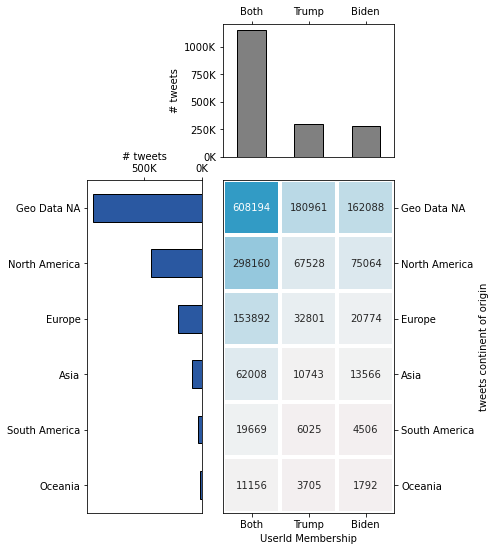

In [27]:
fig, ax=plt.subplots(2,2, figsize=(5.5,9), 
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,3], 'wspace':0.15, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap3(contXtab.loc[contlst,userlst], hm_ax)
hm_ax.set_xlabel('UserId Membership')
hm_ax.set_ylabel('tweets continent of origin')

bar_ax = ax[0,1]
contXtab.loc[contlst,userlst].sum().plot.bar(ax=bar_ax, color=barcolors[7],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_ylabel('# tweets')
bar_ax.set_xlabel('')

barh_ax = ax[1,0]
contXtab.loc[contlst,userlst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[4],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('# tweets')
barh_ax.set_ylabel('')

plt.show()

The heatmap here is investigating the userid of making comments for both trump and biden. It is clear that most data of geo data is from North America. And most userids(~60%）commented on both trump and biden. 

In [28]:
# Identify common tweet creation dates
common_creat=np.intersect1d(biden.created_at_r, trump.created_at_r)

# Mask out data to ensure common lenth arrays to feed visualisation
cnt_tbiden=biden[biden.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()
cnt_ttrump=trump[trump.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()

C:\Users\prue1\anaconda3\envs\geopandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\prue1\anaconda3\envs\geopandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



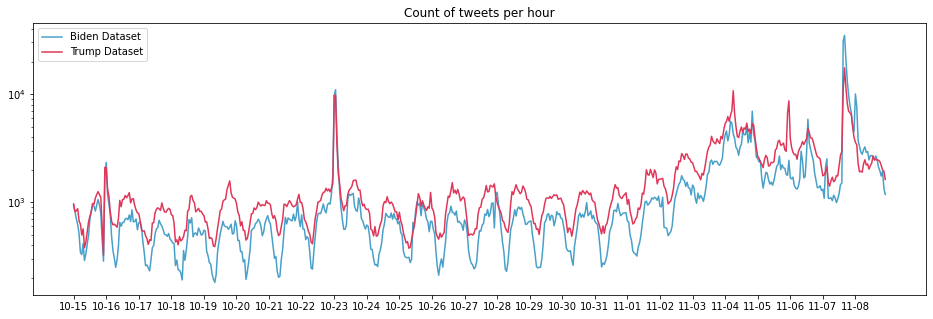

In [29]:
plt.figure(figsize=(16,5))
p6=sns.lineplot(cnt_tbiden.index, cnt_tbiden.values, color=barcolors[3], label='Biden Dataset')
p6.set_title('Count of tweets per hour')
p6=sns.lineplot(cnt_ttrump.index, cnt_ttrump.values, color=barcolors[6], label='Trump Dataset')
p6.set_xticks(range(0, len(cnt_tbiden.index), 24))
p6.set_xticklabels(common_df['created_at'].dt.strftime('%m-%d').unique().tolist())
p6.set_yscale('log')
plt.show()

This plot gives an alternative view of trump and biden comments amount from the publishing data perspective.

It is clear that generally trump is more popular than biden from October to November.

### 3.0 Sentiment Analysis

Now let's focus on the comments from US 

In [30]:
# Only comments from USA are extracted for sentiment analysis
df_trump = trump[trump.country == "United States of America"]
df_biden = biden[biden.country == "United States of America"]
# df_trump = df_trump.drop(columns=['created_at', 'tweet_id', 'source', 'user_id', 'user_name', 'user_screen_name', 
#                                   'user_description', 'user_join_date', 'user_followers_count', 'user_location', 
#                                   'lat', 'long', 'city', 'country', 'continent', 'state', 'state_code', 'collected_at',
#                                   'created_at_r', 'created_at_r2'])
# df_biden = df_biden.drop(columns=['created_at', 'tweet_id', 'source', 'user_id', 'user_name', 'user_screen_name', 
#                                   'user_description', 'user_join_date', 'user_followers_count', 'user_location', 
#                                   'lat', 'long', 'city', 'country', 'continent', 'state', 'state_code', 'collected_at',
#                                   'created_at_r', 'created_at_r2'])

# extract the text data for both trump and biden dataframe
text_trump = df_trump["tweet"]
text_biden = df_biden.tweet

#### 3.1 Clean the text data and high frequency words

Before the N-gram analysis we first must clean the tweets to remove stopwords, strings with "http" etc and then lemmatize the words.

In [31]:
# clean1 function to clean the text data and remove stop words
def clean1(sent):
    filtered_sent=""
    stopwords = nltk.corpus.stopwords.words('english')
    sent = (unicodedata.normalize('NFKD', sent)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    sent = re.sub(r'#.+|https.+|[^(a-zA-Z)\s]','',sent)
    words=sent.split()
    for word in words:
        if word not in stopwords:
            filtered_sent=filtered_sent+' '+word
    return filtered_sent

# cleans function is to lemmatize the words
def clean2(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [32]:
words_trump = clean2(''.join(str(text_trump.apply(clean1).tolist())))
words_biden = clean2(''.join(str(text_biden.apply(clean1).tolist())))
#words_trump[:10]

In [33]:
words_biden[:10]

['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'ccp',
 'thats',
 'always',
 'fine',
 'jack',
 'vijaya',
 'dickc']

In [34]:
# Obtain top 10 Bi and Tri Ngrams from cleaned data
biden_2ngrams=(pd.Series(nltk.ngrams(words_biden, 2)).value_counts())[:10]
trump_2ngrams=(pd.Series(nltk.ngrams(words_trump, 2)).value_counts())[:10]
biden_3ngrams=(pd.Series(nltk.ngrams(words_biden, 3)).value_counts())[:10]
trump_3ngrams=(pd.Series(nltk.ngrams(words_trump, 3)).value_counts())[:10]

# Input Bi and Tri Ngrams into dataframes for plotting
biden_ngrams=pd.concat([biden_2ngrams,biden_3ngrams])
trump_ngrams=pd.concat([trump_2ngrams,trump_3ngrams])

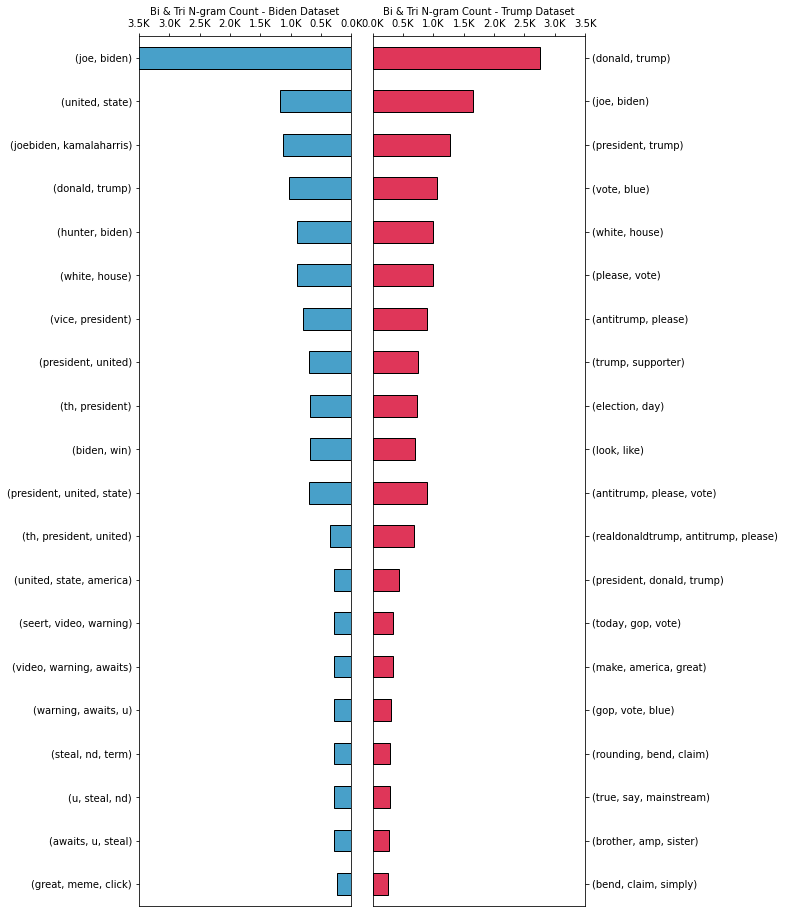

In [35]:
fig, ax=plt.subplots(1,2, figsize=(8,16), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
biden_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Bi & Tri N-gram Count - Biden Dataset')
barh_ax.set_ylabel('')

barh_ax = ax[1]
trump_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Bi & Tri N-gram Count - Trump Dataset')
barh_ax.set_ylabel('')
plt.show()

The bar chart above shows the most common Bi and Tri N-gram's in both trump and biden text data published in USA only. The N-gram's show a clear relation to the upcoming election and each respective dataset seems to be related to each of the presidential candidates.

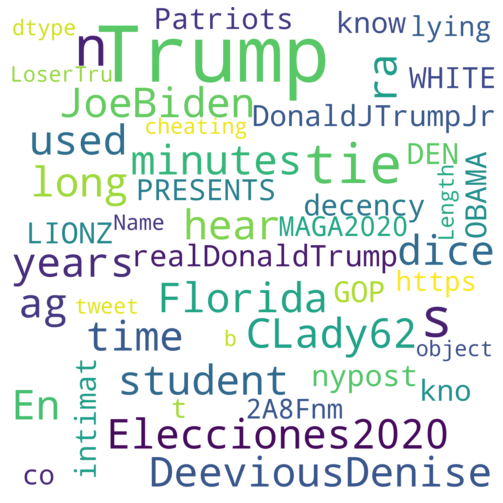

In [36]:
plt.subplots(1,1, figsize=(9,9))
wc_t = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_t.generate(str(text_trump.dropna()))
plt.imshow(wc_t, interpolation="bilinear")
plt.axis('off')
plt.show()

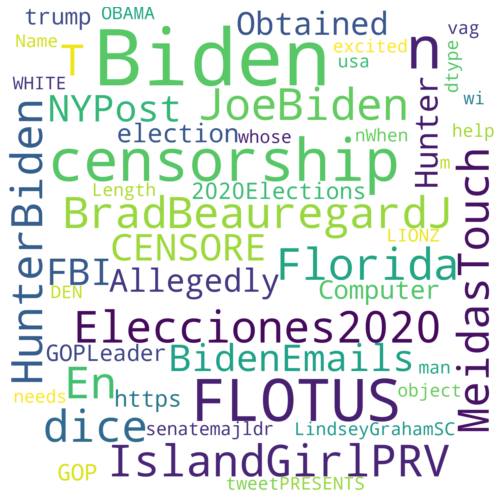

In [37]:
# wordcloud of biden text data 
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(text_biden.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

The wordcloud is a good way to show the high frequency words in the text data. But generally speaking, the wordcloud of both trump and biden don't give much information here.

#### 3.2 Sentiment analysis

In [38]:
#import nltk
#nltk.download('vader_lexicon')

In [39]:
# Obtain sentiment scores for both datasets
sid = SentimentIntensityAnalyzer()
biden['VADAR']=sentiment(biden['tweet'])
trump['VADAR']=sentiment(trump['tweet'])
biden['compound']  = biden['VADAR'].apply(lambda score_dict: score_dict['compound'])
trump['compound']  = trump['VADAR'].apply(lambda score_dict: score_dict['compound'])
trump['sentiment']  = trump['compound'].apply(lambda x: 'pos' if x > 0.1 else ('neg' if x < -0.1 else 'neu'))
biden['sentiment']  = biden['compound'].apply(lambda x: 'pos' if x > 0.1 else ('neg' if x < -0.1 else 'neu'))

# Create 52 state set
states=set(biden.loc[biden['country'] == 'United States of America']['state'].dropna())
states.remove('District of Columbia')
states.remove('Northern Mariana Islands')

# Create feature to allow masking of data and then mask data for votable states
biden['voting_rights']=biden['state'].apply(lambda x: 'Yes' if x in states else 'No')
trump['voting_rights']=trump['state'].apply(lambda x: 'Yes' if x in states else 'No')
sent_t=trump.loc[trump['voting_rights'] == 'Yes']
sent_b=biden.loc[biden['voting_rights'] == 'Yes']

# Further mask data for only the last 14 days
state_b=sent_b.loc[sent_b['created_at'] > max(sent_b['created_at']) - timedelta(14)]
state_t=sent_t.loc[sent_t['created_at'] > max(sent_t['created_at']) - timedelta(14)]
state_b_mean=state_b.groupby('state')['compound'].mean().reset_index()
state_t_mean=state_t.groupby('state')['compound'].mean().reset_index()

# Further mask data for only the last 14 days
state_bp=sent_b.loc[sent_b['created_at'] < min(sent_b['created_at']) + timedelta(14)]
state_tp=sent_t.loc[sent_t['created_at'] < min(sent_t['created_at']) + timedelta(14)]
state_bp_mean=state_bp.groupby('state')['compound'].mean().reset_index()
state_tp_mean=state_tp.groupby('state')['compound'].mean().reset_index()

# Create dataframe for visualisation
states_sent=pd.DataFrame({'state':state_b_mean['state'],
                          'biden1':state_b_mean['compound'],
                          'trump1':state_t_mean['compound'],
                          'biden2':state_bp_mean['compound'],
                          'trump2':state_tp_mean['compound'],})

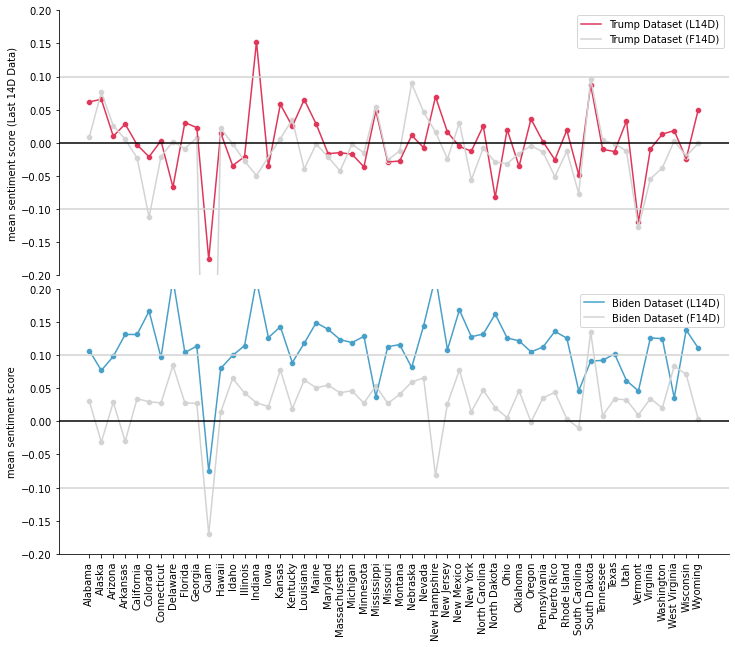

In [47]:
fig, ax=plt.subplots(2,1, figsize=(12,10), gridspec_kw={'hspace':0.05})
lineax=ax[0]
sns.lineplot(x='state', y='trump1', color=barcolors[6], data=states_sent, ax=lineax, label='Trump Dataset (L14D)')
sns.scatterplot(x='state', y='trump1', color=barcolors[6], data=states_sent, ax=lineax)
sns.lineplot(x='state', y='trump2', color='lightgrey', data=states_sent, ax=lineax, label='Trump Dataset (F14D)')
sns.scatterplot(x='state', y='trump2', color='lightgrey', data=states_sent, ax=lineax)
lineax.set_ylim([-0.2, 0.2])
lineax.set_ylabel('mean sentiment score (Last 14D Data)')
lineax.set_xlabel('')
plt.xticks(rotation=90)
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.1, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.1, color='lightgrey', linestyle='-')
lineax.axes.get_xaxis().set_ticks([])
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
lineax.spines['bottom'].set_visible(False)

lineax=ax[1]
sns.lineplot(x='state', y='biden1', color=barcolors[3], data=states_sent, ax=lineax, label='Biden Dataset (L14D)')
sns.scatterplot(x='state', y='biden1', color=barcolors[3], data=states_sent, ax=lineax)
sns.lineplot(x='state', y='biden2', color='lightgrey', data=states_sent, ax=lineax, label='Biden Dataset (F14D)')
sns.scatterplot(x='state', y='biden2', color='lightgrey', data=states_sent, ax=lineax)
lineax.set_ylim([-0.2, 0.2])
lineax.set_ylabel('mean sentiment score')
lineax.set_xlabel('')
plt.xticks(rotation=90)
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.1, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.1, color='lightgrey', linestyle='-')
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
plt.show()

In [61]:
# Taking the daily score average and check whether there is a trend associated with trump or biden's score over time.
score_trump = trump[trump.country == "United States of America"]
score_trump = score_trump[['created_at', 'compound', 'state']]

score_biden = biden[biden.country == "United States of America"]
score_biden = score_biden[['created_at', 'compound', 'state']]

# Get the daily average score for all states combined
score_trump = score_trump.set_index("created_at")
score_biden = score_biden.set_index("created_at")

trump_mean = score_trump.groupby(score_trump.index.strftime("%m-%d")).mean()
biden_mean = score_biden.groupby(score_biden.index.strftime("%m-%d")).mean()

Text(0, 0.5, 'Average sentiment score')

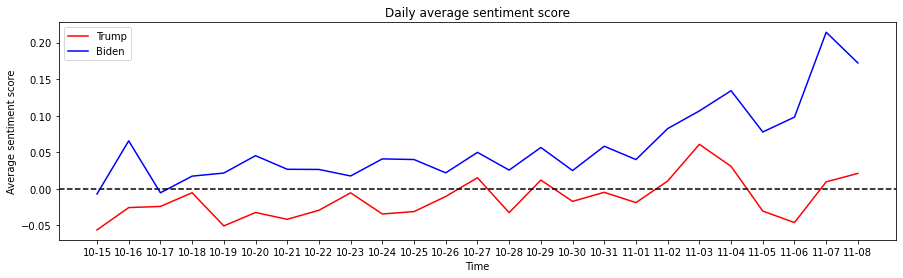

In [70]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=trump_mean, x = "created_at", y = "compound", color = "red", label = "Trump")
sns.lineplot(data=biden_mean, x = "created_at", y = "compound", color = "blue", label = "Biden")
ax.axhline(y=0, color='k', linestyle='--')
ax.set_title("Daily average sentiment score")
ax.set_xlabel("Time")
ax.set_ylabel("Average sentiment score")

From the daily average sentiment score plots of Trump and Biden, it is clear that Biden has higher sentiment score over time. For majority time, Biden has positive score whiel trump has negative score.

#### 3.3 Representative states sentiment analysis

In [149]:
# Look at Florida state (Trump won this state)
fl_trump = trump[trump.state == "Florida"]
stat_trump = fl_trump['sentiment'].value_counts().rename_axis('sentiment').reset_index(name='counts')
#print("Trump's different sentiment counts:\n", stat_trump)

fl_biden = biden[biden.state == "Florida"]
stat_biden = fl_biden['sentiment'].value_counts().rename_axis('sentiment').reset_index(name='counts')
#print("\nBiden's different sentiment counts:\n", stat_biden)

sum_trump = np.sum(stat_trump.counts)
sum_biden = np.sum(stat_biden.counts)

stat_trump['percentage'] = stat_trump.counts/sum_trump
stat_biden['percentage'] = stat_biden.counts/sum_biden

Text(0.5, 1.0, 'Florida state')

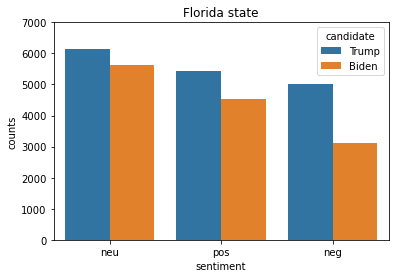

In [150]:
merge = pd.concat([stat_trump, stat_biden], keys=['Trump', 'Biden'])
merge.reset_index(inplace=True)
merge.columns = ['candidate', 'junk', 'sentiment', 'counts', 'percentage']
merge.drop(columns=['junk'], inplace=True)
#merge.head()

ax = sns.barplot(x="sentiment", y="counts", hue="candidate", data=merge)
ax.set_ylim(0, 7000)
ax.set_title("Florida state")

Text(0.5, 1.0, 'Florida state')

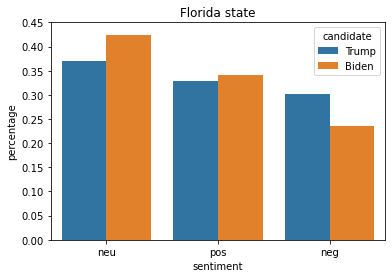

In [153]:
ax = sns.barplot(x="sentiment", y="percentage", hue="candidate", data=merge)
ax.set_ylim(0, 0.45)
ax.set_title("Florida state")

In [86]:
# Taking the daily score average for Florida 
score_trump = fl_trump[['created_at', 'compound', 'state']]

score_biden = fl_biden[['created_at', 'compound', 'state']]

# Get the daily average score 
score_trump = score_trump.set_index("created_at")
score_biden = score_biden.set_index("created_at")

trump_mean = score_trump.groupby(score_trump.index.strftime("%m-%d")).mean()
biden_mean = score_biden.groupby(score_biden.index.strftime("%m-%d")).mean()

Text(0, 0.5, 'Average sentiment score')

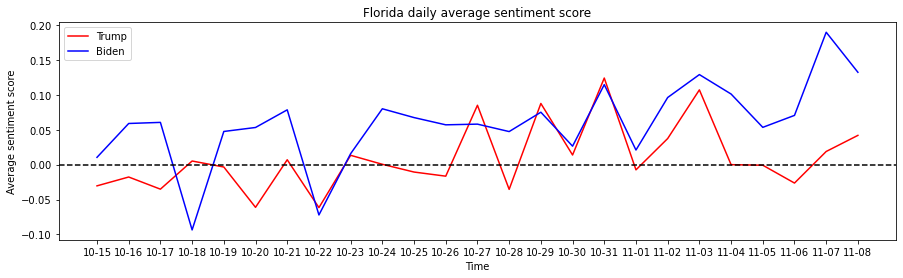

In [87]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=trump_mean, x = "created_at", y = "compound", color = "red", label = "Trump")
sns.lineplot(data=biden_mean, x = "created_at", y = "compound", color = "blue", label = "Biden")
ax.axhline(y=0, color='k', linestyle='--')
ax.set_title("Florida daily average sentiment score")
ax.set_xlabel("Time")
ax.set_ylabel("Average sentiment score")

##### Offical presidential election result in Florida

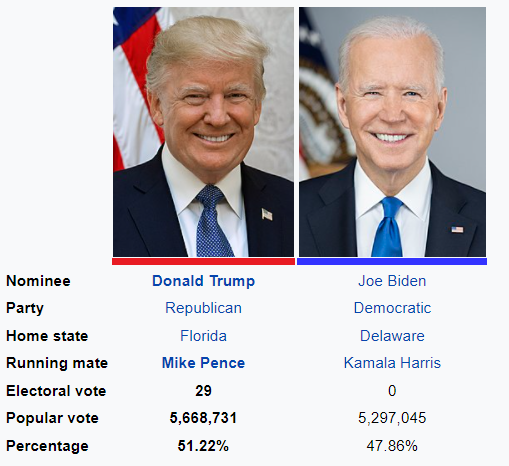

In [154]:
# Look at California state (Biden won this state)
ca_trump = trump[trump.state == "California"]
stat_trump = ca_trump['sentiment'].value_counts().rename_axis('sentiment').reset_index(name='counts')
#print("Trump's different sentiment counts:\n", stat_trump)

ca_biden = biden[biden.state == "California"]
stat_biden = ca_biden['sentiment'].value_counts().rename_axis('sentiment').reset_index(name='counts')
#print("\nBiden's different sentiment counts:\n", stat_trump)

sum_trump = np.sum(stat_trump.counts)
sum_biden = np.sum(stat_biden.counts)

stat_trump['percentage'] = stat_trump.counts/sum_trump
stat_biden['percentage'] = stat_biden.counts/sum_biden

Text(0.5, 1.0, 'Florida state')

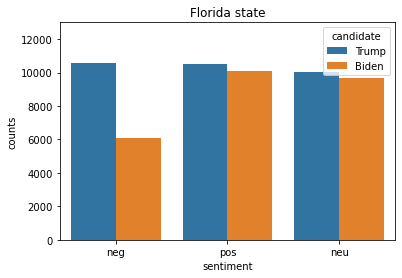

In [156]:
merge = pd.concat([stat_trump, stat_biden], keys=['Trump', 'Biden'])
merge.reset_index(inplace=True)
merge.columns = ['candidate', 'junk', 'sentiment', 'counts', 'percentage']
merge.drop(columns=['junk'], inplace=True)
#merge.head()

ax = sns.barplot(x="sentiment", y="counts", hue="candidate", data=merge)
ax.set_ylim(0, 13000)
ax.set_title("Florida state")

Text(0.5, 1.0, 'Florida state')

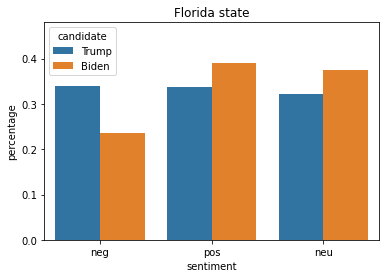

In [159]:
ax = sns.barplot(x="sentiment", y="percentage", hue="candidate", data=merge)
ax.set_ylim(0, 0.48)
ax.set_title("Florida state")

In [141]:
# Taking the daily score average for Florida 
score_trump = ca_trump[['created_at', 'compound', 'state']]

score_biden = ca_biden[['created_at', 'compound', 'state']]

# Get the daily average score 
score_trump = score_trump.set_index("created_at")
score_biden = score_biden.set_index("created_at")

trump_mean = score_trump.groupby(score_trump.index.strftime("%m-%d")).mean()
biden_mean = score_biden.groupby(score_biden.index.strftime("%m-%d")).mean()

Text(0, 0.5, 'Average sentiment score')

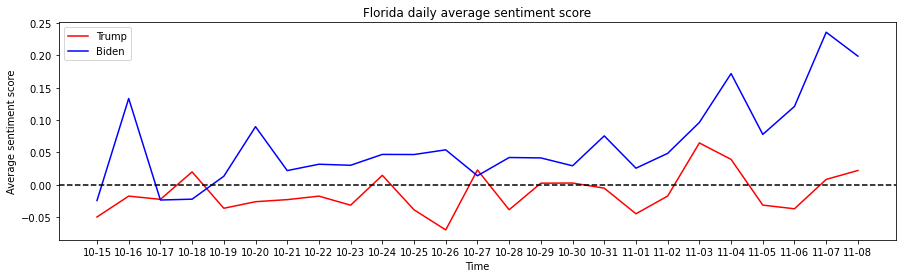

In [142]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(data=trump_mean, x = "created_at", y = "compound", color = "red", label = "Trump")
sns.lineplot(data=biden_mean, x = "created_at", y = "compound", color = "blue", label = "Biden")
ax.axhline(y=0, color='k', linestyle='--')
ax.set_title("Florida daily average sentiment score")
ax.set_xlabel("Time")
ax.set_ylabel("Average sentiment score")

##### Offical presidential election result in California

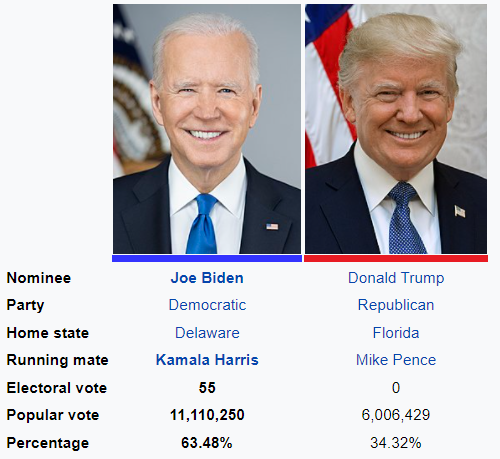

#### 3.4 Summary

The twitter text data give a sample to analyze which candidate has better chance to win the 2020 US presidential election. Based on the work above, it is clear that Biden generally has higher sentiment socre in most states. Biden won the 2020 election. People might say that twitter data reflects the election reality.

However, when look at Florida and California state, the Florida result is opposite with the twitter data analysis. From the statistical standpoint, it is safe to say that twitter data is not a good sample to represent the whole popupation.